# Processus

## Qu'est-ce qu'un processus ?

Un **processus** est un programme en cours d'exécution ce qui signifie :

- un ensemble d'instructions à exécuter réunies dans un fichier dit exécutable,
- un espace mémoire dédié par le système d'exploitation à ce processus pour lui permettre de travailler sur des données qui lui sont propres.
- des ressources matérielles à lui réserver : processeur, entrées-sorties, carte réseau, wifi,...

C'est le système d'exploitation qui gère les processus sans aucune interaction de l'utilisateur.

La création d'un processus se fait :

- soit au démarrage du système d'exploitation : un premier processus est créé et sera le père de tous les autres processus lancés par la suite;
- soit par un appel d'un autre processus en cours d'exécution;
- soit par un utilisateur en lançant une application ou en exécutant un programme.

### Identifiant de processus

Le système d'exploitation identifie chaque processus par un numéro unique : le **PID** acronyme de **Process Identifier**.

Lorsqu'un processus engendre un fils, le système d'exploitation génère un nouveau numéro de processus pour le fils.

Le fils connaît le PID de son père qui est le **PPID** acronyme de **Parent Process Identifier**.

### États d'un processus

Dans un système d'exploitation, plusieurs processus sont actifs simultanément, mais un processeur (simple coeur) ne peut exécuter qu’une instruction à la fois. Il va donc falloir partager le temps de processeur disponible entre tous les processus : c'est le travail de **l'ordonnanceur** ou **scheduler** en anglais.

Chaque processus suit un cycle de vie défini par l'ordonnanceur. Un processus peut se trouver dans 3 états différents :

- à l'état **prêt** ce qui signifie qu'il est dans la file des processus à exécuter.
- à l'état **actif** ou **élu** ce qui signifie qu'il est en cours d'exécution.
- à l'état **bloqué** ou **en attente**, c'est à dire en attente d'un événement ou de données.

À la création d'un **processus** celui-ci est à l'état **prêt**.

Un processus se trouve dans l'un de ces trois états constituant son cycle de vie.

À la fin d'un programme ou lorsque l'utilisateur ferme une application, le processus est à l'état **terminé**.

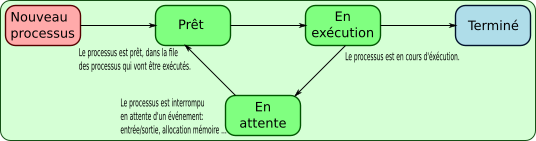

C'est le système d'exploitation qui crée les processus. L'ordonnanceur gère les différents états des processus. Pour choisir le processus qui va repasser en mode exécution, l'ordonnanceur applique un algorithme. Cet algorithme impacte directement la réactivité du système et les usages qui pourront en être fait. C'est un élément critique du système d'exploitation.

## Interblocage

L'interblocage est une situation dans laquelle tous les intervenants sont bloqués tant que l'un d'eux ne se décide à mettre fin au blocage.

Prenons l'exemple d'un carrefour avec des priorités à droite. Si des véhicules arrivent en même temps sur toutes les voies, ils se retrouvent bloqués.

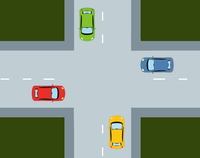

### En informatique

En informatique également, l'interblocage peut se produire lorsque des processus concurrents s'attendent mutuellement. Les processus bloqués dans cet état le sont définitivement.

Ce scénario peut se produire dans un environnement où des ressources sont partagées entre plusieurs processus et l'un d'entre eux détient indéfiniment une ressource nécessaire pour l'autre.

Les systèmes d'exploitation gèrent les interblocages pour les éviter.

Supposons un système possédant les ressources 1 et 2, ayant les processus A et B en exécution. Une façon de provoquer un interblocage est la suivante :

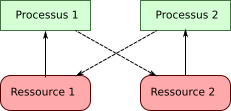

- Le processus A réserve la ressource 1;
- Le processus B réserve la ressource 2;
- Le processus A demande la ressource 2, et tombe en attente;
- Le processus B demande la ressource 1, et tombe en attente;

Interblocage !

### Éviter l'interblocage

Il existe différents moyens pour éviter l'interblocage comme par exemple le [**mutex**](https://fr.wikipedia.org/wiki/Exclusion_mutuelle) et des algorithmes comme l'[**algorithme du banquier**](https://fr.wikipedia.org/wiki/Algorithme_du_banquier). 

## Les systèmes d'exploitation

Chaque système d'exploitation gère les processus. Certaines différences apparaissent entre Windows et Linux.

### Système windows

Pour visualiser les différents processus on utilise le **gestionnaire des taches** qui renseigne sur la quantité de mémoire et processeur utilisé par le processus. Il permet également de connaître le PID du processus.

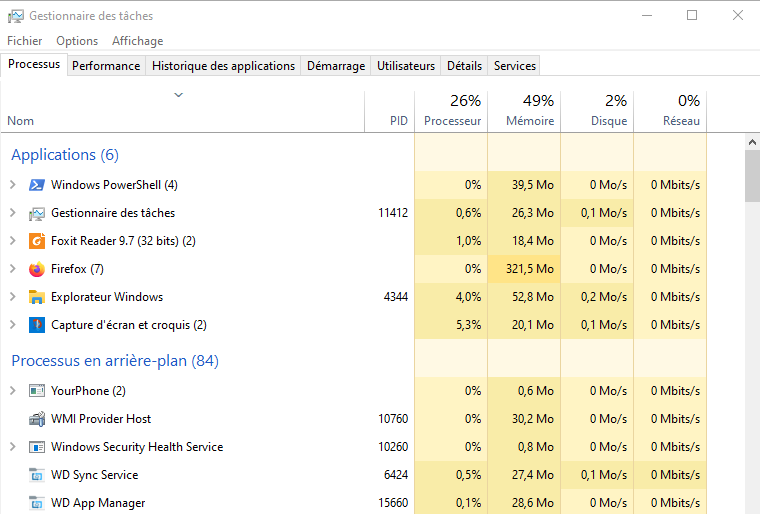

Cette interface graphique permet d'arreter facilement un processus par un clic droit et **fin de tache**.

Il est aussi possible de connaître les processus en ligne de commande mais l'interface graphique est plus conviviale.

### Système Linux

Le système Linux a la particularité de pouvoir fonctionner sans passer par des interfaces graphiques. Pour afficher les processus et connaître leur état, on utilise la ligne de commandes dans un shell ou un terminal:

#### La commande ps

Pour afficher les processus en cours, on utilise la commande **ps**

```bash
ps
```

La réponse du terminal :

![linux_ps.png](attachment:linux_ps.png)

Les processus affichés sont ceux de l'utilisateur. Il n'y en a que 2. On peut noter comme information:

- le PID de chaque processus;
- la console TTY actuellement utilisée
- la commande (programme) CMD associé au processus
- La colonne TIME indique la durée d'utilisation du processeur

Il faut reconnaître que l'information donnée est peu verbeuse. Ajoutons des options à la commande :

1. l'option **ef** permet de connaitre tous les processus sur toutes les consoles :

```bash
ps -ef
```

On obtient l'affichage :

![linux_ps-ef.png](attachment:linux_ps-ef.png)

...
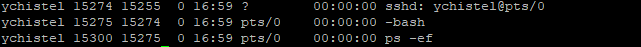

On remarque 2 colonnes supplémentaires:

- La colonne UID qui indique l'utilisateur à l'origine du processus lancé
- La colonne STIME qui donne l'heure de lancement du processus

2. l'option **eo** permet de préciser les colonnes à afficher :

```bash
ps -eo pid,ppid,stat,command
```

On obtient l'affichage :

![linux_ps-eo.png](attachment:linux_ps-eo.png)

...
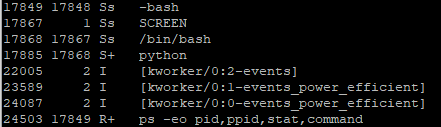

- la colonne STAT donne l'état du processus : S pour Sleep donc bloqué et R pour Run donc actif ou élu.
- la colonne commande donne le programme associé au processus.

#### La commande top

C'est léquivalent du gestionnaire de tâche de windows. En lui affectant des options, on peut sélectionner les affichages. C'est un affichage dynamique qui change toute les 3 secondes.

Par exemple, l'option **u** permet de sélectionner l'utilisateur:

```bash
top -u utilisateur
```

![linux_top.png](attachment:linux_top.png)